# Diffusion Model

This code was written for an assignment in SI 608 - Networks (University of Michigan School of Information, Fall 2020, Prof. Ceren Budak and Graduate Student Instructor Yijing Chen). All code is my own. **Bolded text** indicates problems written by class instructors. I have removed all problem instructions that are not relevant to the work being showcased here.

## Problem 1

**You will implement a really basic cascade model. Each node has an `infected_status` field which is set to:**

- **0 - white, uninfected**
- **1 - red, infection**
- **2 - blue, infection**
- **3 - yellow, inoculated (uninfectable)**

**Implement the following simple cascade model (uninfected nodes take on the majority color of their neighbors):**


**def run_simulation(inputgraph): 
```
	loop while there are nodes that can be infected:
		for each node n:
			if inoculated or already infected, ignore
			if uninfected:
				look at the node’s neighbors to determine which color has more votes
				if no neighbors are already infected: leave the node alone for now
                if two color share the same votes: choose randomly
				else: 
                    there is a 80% chance the node's infected status will change to the color of majority
                    there is a 20% chance the node's infected status will change to the color of minority
```

**You may assume that:  
a) the graph will be undirected,  
b) only have one connected component, and   
c) at least one node will be infected when you’re given the graph.** 

**Don’t forget that time moves in discrete steps—neighbors infected at `t` can start infecting you at `t+1`. I encourage you to test your algorithm (with a smaller graph) to make sure it does what you are aiming for (try to see what happens for a few graphs you know what to expect).**

**Note: If my neighbors include 2 red and 3 blue nodes at time t and I am not inoculated, there's a 80% chance I would turn blue and 20% chance I would turn red in the next time step (t+1). In case of ties, pick randomly.**

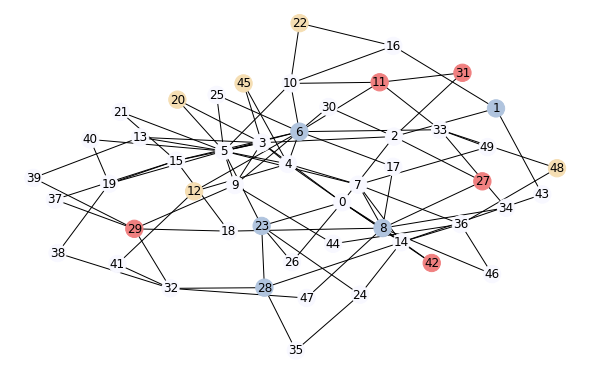

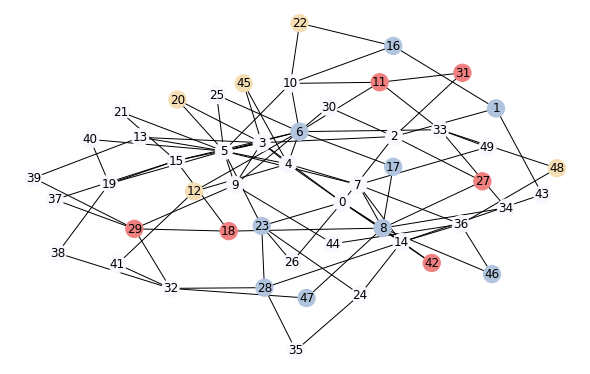

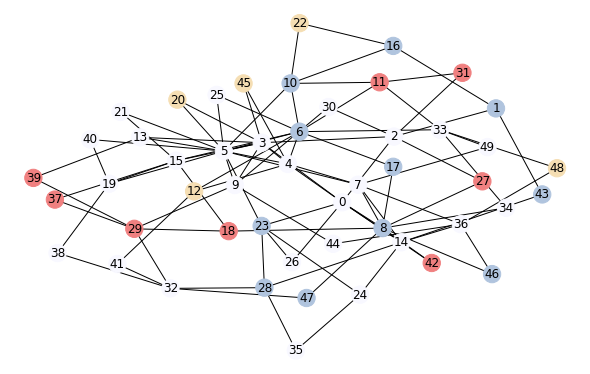

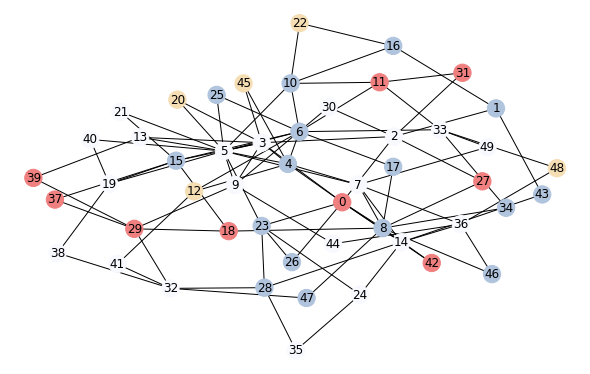

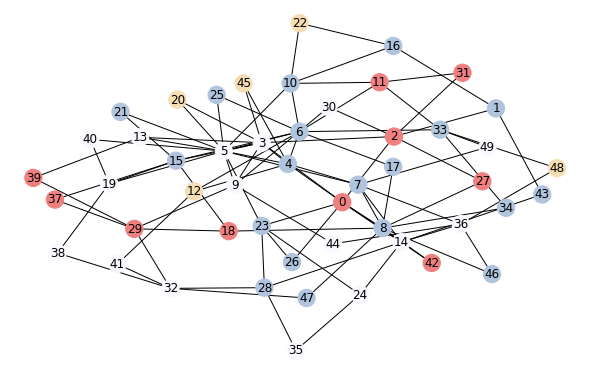

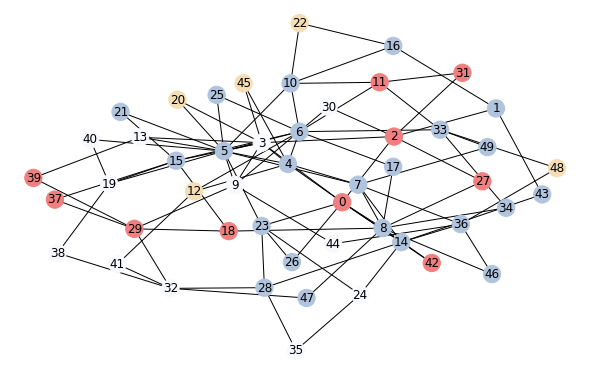

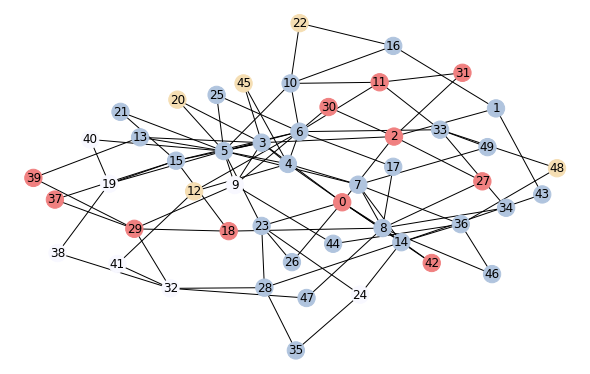

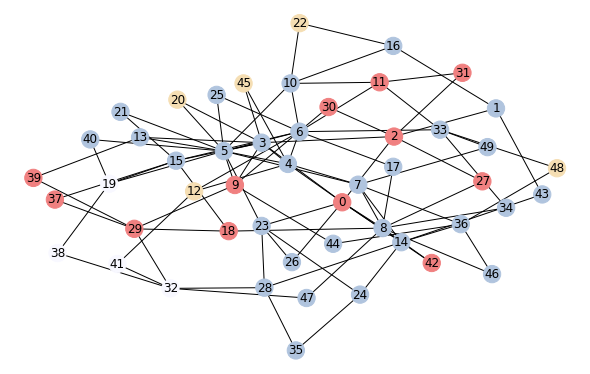

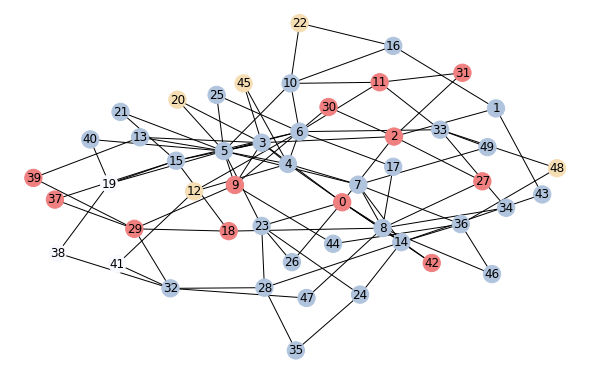

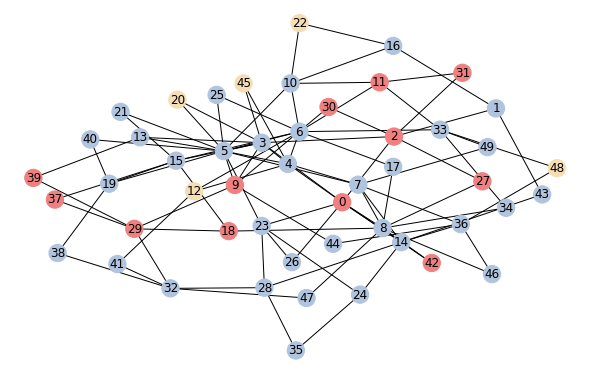

In [3]:
# test graph only
test_g = nx.barabasi_albert_graph(n = 50, m = 2, seed = 8645)

def run_simulation(g, pct_infected_1 = 0.1, pct_infected_2 = 0.1, pct_inoculated = 0.1, 
                   num_infected_1 = None, num_infected_2 = None, num_inoculated = None,
                   max_time_steps = None, show_iters = False):
    
    # referenced https://www.w3resource.com/python-exercises/list/python-data-type-list-exercise-30.php to get count of infected_statuses
    
    import collections
    import random
    import networkx as nx
    import numpy as np
    import math
    import matplotlib.pyplot as plt
    
    val_map = {0: "ghostwhite",       # white: uninfected
               1: "lightcoral",       # red: infected
               2: "lightsteelblue",   # blue: infected
               3: "wheat"}            # yellow: uninfectable
    
    # choosing nodes to be infected/inoculated
    g_copy = g.copy()
    
    if num_infected_1 == None:
        num_infected_nodes_1 = math.ceil(pct_infected_1 * len(g.nodes()))
    else:
        num_infected_nodes_1 = num_infected_1
        
    if num_infected_2 == None:
        num_infected_nodes_2 = math.ceil(pct_infected_1 * len(g.nodes()))
    else:
        num_infected_nodes_2 = num_infected_2
        
    if num_inoculated == None:
        num_inoculated_nodes = math.ceil(pct_infected_1 * len(g.nodes()))
    else:
        num_inoculated_nodes = num_inoculated
        
    infected_nodes_1 = random.sample(g_copy.nodes(), num_infected_nodes_1)
    
    uninfected_nodes = []
    for i in g_copy.nodes():
        if i not in infected_nodes_1:
            uninfected_nodes.append(i)
            
    infected_nodes_2 = random.sample(uninfected_nodes, num_infected_nodes_2)
    
    uninfected_nodes = []
    for i in g_copy.nodes():
        if i not in infected_nodes_1:
            if i not in infected_nodes_2:
                uninfected_nodes.append(i)
    
    inoculated_nodes = random.sample(uninfected_nodes, num_inoculated_nodes)

    # setting node attributes to (un)infected/inoculated

    nx.set_node_attributes(g_copy, values = 0, name = 'infected_status')
    
    for node in infected_nodes_1:
        g_copy.nodes[node]['infected_status'] = 1
        
    for node in infected_nodes_2:
        g_copy.nodes[node]['infected_status'] = 2
        
    for node in inoculated_nodes:
        g_copy.nodes[node]['infected_status'] = 3

    # setting time steps
    
    if max_time_steps == None:
        max_time_steps = len(g_copy.nodes())
    
    t = 0
    
    if show_iters == True:
        infected_colors = [val_map[g_copy.nodes[n]["infected_status"]] for n in g_copy.nodes()]
        plt.figure(figsize = (8,5))
        nx.draw_kamada_kawai(g_copy, node_color = infected_colors, edge_color = "k", with_labels=True)
    
    # iterating through time steps    
    
    while t < max_time_steps:
        already_looped_through = []
        infected_nodes_this_round = []
        updated_statuses = {}
        
        for node in g_copy.nodes():
            if g_copy.nodes[node]['infected_status'] == 1 or g_copy.nodes[node]['infected_status'] == 2:
                infected_nodes_this_round.append(node)
        
        for node in infected_nodes_this_round:
            neighbors = list(nx.neighbors(g_copy, node))
            
            for neighbor in neighbors:
                if neighbor not in already_looped_through:
                    already_looped_through.append(neighbor)
                    if g_copy.nodes[neighbor]['infected_status'] == 0:
                        if g_copy.degree[neighbor] == 1:
                            updated_statuses[neighbor] = {'infected_status': g_copy.nodes[node]['infected_status']}
                            #g_copy.nodes[neighbor]['infected_status'] = g_copy.nodes[node]['infected_status']
                        else:
                            neighbor_neighbors = list(nx.neighbors(g_copy, neighbor))
                            neighbor_neighbors_status = dict(
                                collections.Counter(
                                    [g_copy.nodes[neighbor_neighbor]['infected_status'] for neighbor_neighbor in neighbor_neighbors] # if g_copy.nodes[neighbor_neighbor]['infected_status'] != 3]
                                )
                            )

                            status_max = []
                            status_min = []

                            for key, value in neighbor_neighbors_status.items():

                                if neighbor_neighbors_status[key] == max(neighbor_neighbors_status.values()):
                                    status_max.append(key)
                                elif neighbor_neighbors_status[key] == min(neighbor_neighbors_status.values()):
                                    status_min.append(key)

                            if status_max == [0,3] or status_max == [3,0] or status_max == [3]:
                                status_max = [0]
                            if len(status_max) > 1:
                                updated_statuses[neighbor] = {'infected_status': random.choice(status_max)}
                                #g_copy.nodes[neighbor]['infected_status'] = random.choice(status_max)
                            elif len(status_max) == 1:
                                prob_list = [status_max[0] for i in range(0,8)]
                                for i in range(0,2):
                                    try:
                                        prob_list.append(random.choice(status_min))
                                        updated_statuses[neighbor] = {'infected_status': random.choice(prob_list)}
                                    except: # this means that there is only one status among the neighbor's neighbors (i.e. status_min is empty)
                                        updated_statuses[neighbor] = {'infected_status': g_copy.nodes[node]['infected_status']}

                            if updated_statuses[neighbor] == {'infected_status': 3}:
                                updated_statuses[neighbor] = {'infected_status': 0}
                            
                #print(infected_nodes_this_round, neighbors, neighbor_neighbors,neighbor_neighbors_status, already_looped_through, updated_statuses)
            
        nx.set_node_attributes(g_copy, updated_statuses)
        
        if show_iters == True:
            infected_colors = [val_map[g_copy.nodes[n]["infected_status"]] for n in g_copy.nodes()]
            plt.figure(figsize = (8,5))
            nx.draw_kamada_kawai(g_copy, node_color = infected_colors, edge_color = "k", with_labels=True)

        t+=1
        
        if 0 not in nx.get_node_attributes(g_copy, 'infected_status').values():
            break

    return g_copy
    
infected_test_g = run_simulation(test_g, num_infected_1 = 5, num_infected_2 = 5, num_inoculated = 5, show_iters = True)

## Problem 2


**Now imagine that the influence of an infected neighbor depends on the number of common neighbors two nodes share. E.g., a neighbor with 3 common neighbors with you will is 3 times more likely to change your color toward them than a neighbor who only shares 1 common neighbor with you.**

**You can operationalize this in your function by changing the step counting the votes for each color. In problem 1, when you look at your neighborhood, each neighbor get one vote and the color with the majority votes wins. This time, the number of votes each neighbor has is proportional (or simply, equal to) the number of common neighbors they share with you. After summing up all the votes from your neighborhood, you will change your color to the color of majority.**

**So the new process looks like:**

```
def run_simulation(inputgraph): 
    loop while there are nodes that can be infected:
        for each node n:
            if inoculated or already infected, ignore
            if uninfected:
                look at the node’s neighbors:
                for each neighbor:
                    # votes == # common neighbors 
                find the color of majority
                if no neighbors are already infected (no votes at all): leave the node alone for now
                if two color share the same votes: choose randomly
                else: 
                    change the node color to the color of majority
```


**Create a new function `run_simulation2()` that encodes this model. Compare the fraction of the graph infected by red for the two models for when the graph is the Lada network (`LadaFacebookAnon.net`, you used this network in assignment 2), the number of randomly selected nodes to infect with blue is 10, the number of randomly selected nodes to inoculate is 5, and vary the number of nodes to infect with red between 5-10 (by increments of 1).**

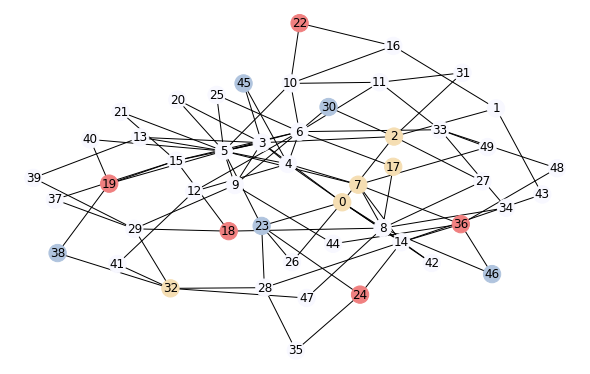

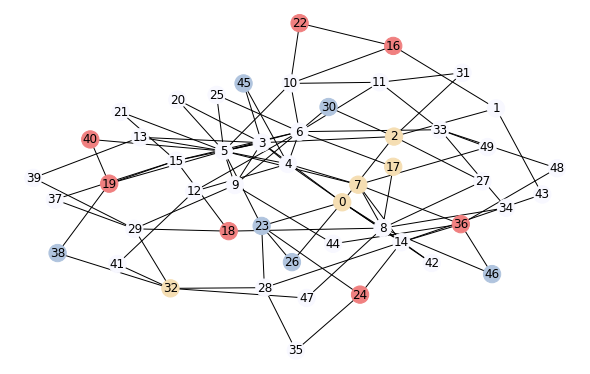

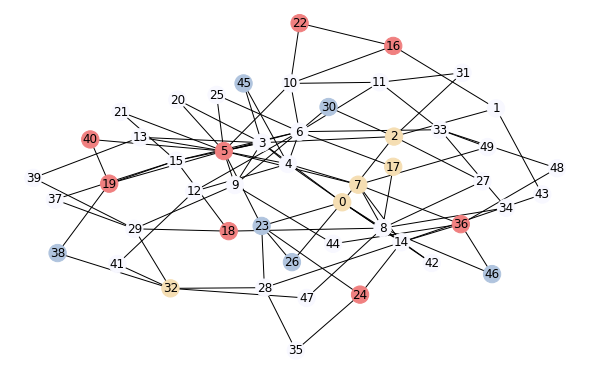

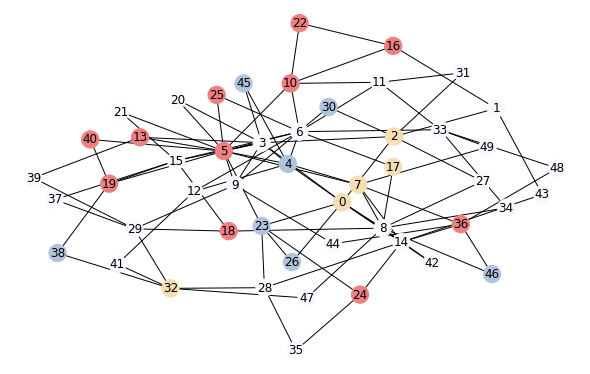

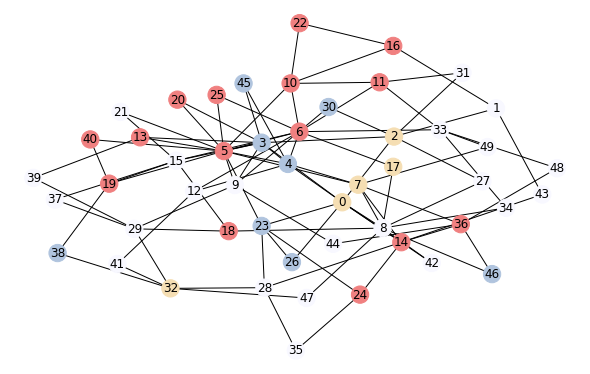

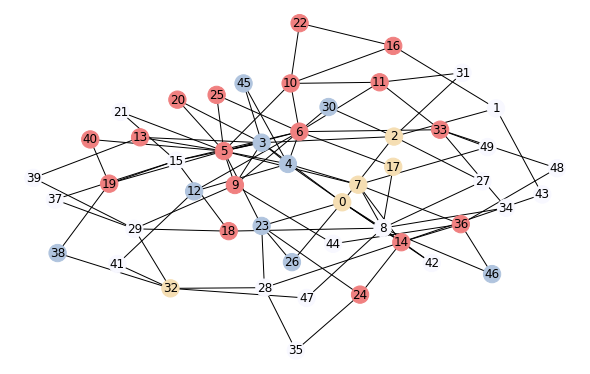

In [5]:
def run_simulation2(g, pct_infected_1 = 0.1, pct_infected_2 = 0.1, pct_inoculated = 0.1, 
                   num_infected_1 = None, num_infected_2 = None, num_inoculated = None,
                   max_time_steps = None, show_iters = False):
    
    # referenced https://www.w3resource.com/python-exercises/list/python-data-type-list-exercise-30.php to get count of infected_statuses
    
    import collections
    import random
    import networkx as nx
    import numpy as np
    import math
    import matplotlib.pyplot as plt
    
    val_map = {0: "ghostwhite",       # white: uninfected
               1: "lightcoral",       # red: infected
               2: "lightsteelblue",   # blue: infected
               3: "wheat"}            # yellow: uninfectable
    
    # choosing nodes to be infected/inoculated
    g_copy = g.copy()
    
    if num_infected_1 == None:
        num_infected_nodes_1 = math.ceil(pct_infected_1 * len(g.nodes()))
    else:
        num_infected_nodes_1 = num_infected_1
        
    if num_infected_2 == None:
        num_infected_nodes_2 = math.ceil(pct_infected_1 * len(g.nodes()))
    else:
        num_infected_nodes_2 = num_infected_2
        
    if num_inoculated == None:
        num_inoculated_nodes = math.ceil(pct_infected_1 * len(g.nodes()))
    else:
        num_inoculated_nodes = num_inoculated
    
    infected_nodes_1 = random.sample(g_copy.nodes(), num_infected_nodes_1)
    
    uninfected_nodes = []
    for i in g_copy.nodes():
        if i not in infected_nodes_1:
            uninfected_nodes.append(i)
            
    infected_nodes_2 = random.sample(uninfected_nodes, num_infected_nodes_2)
    
    uninfected_nodes = []
    for i in g_copy.nodes():
        if i not in infected_nodes_1:
            if i not in infected_nodes_2:
                uninfected_nodes.append(i)
    
    inoculated_nodes = random.sample(uninfected_nodes, num_inoculated_nodes)
    
    # setting node attributes to (un)infected/inoculated

    nx.set_node_attributes(g_copy, values = 0, name = 'infected_status')
    
    for node in infected_nodes_1:
        g_copy.nodes[node]['infected_status'] = 1
        
    for node in infected_nodes_2:
        g_copy.nodes[node]['infected_status'] = 2
        
    for node in inoculated_nodes:
        g_copy.nodes[node]['infected_status'] = 3

    # setting time steps
    
    if max_time_steps == None:
        max_time_steps = len(g_copy.nodes())
    
    t = 0
    
    if show_iters == True:
        infected_colors = [val_map[g_copy.nodes[n]["infected_status"]] for n in g_copy.nodes()]
        plt.figure(figsize = (8,5))
        nx.draw_kamada_kawai(g_copy, node_color = infected_colors, with_labels=True)
    
    # iterating through time steps    
    
    while t < max_time_steps:
        already_looped_through = []
        infected_nodes_this_round = []
        updated_statuses = {}
        
        for node in g_copy.nodes():
            if g_copy.nodes[node]['infected_status'] == 1 or g_copy.nodes[node]['infected_status'] == 2:
                infected_nodes_this_round.append(node)
        
        for node in infected_nodes_this_round:
            neighbors = list(nx.neighbors(g_copy, node))
            
            for neighbor in neighbors:
                if neighbor not in already_looped_through:
                    already_looped_through.append(neighbor)
                    if g_copy.nodes[neighbor]['infected_status'] == 0:
                        neighbor_neighbors = list(nx.neighbors(g_copy, neighbor))
                        neighbor_neighbors_status = dict(
                            collections.Counter(
                                [g_copy.nodes[neighbor_neighbor]['infected_status'] for neighbor_neighbor in neighbor_neighbors] # if g_copy.nodes[neighbor_neighbor]['infected_status'] != 3]
                                )
                            )                
                        
                        prob_list = []
                    
                        for neighbor_neighbor in neighbor_neighbors:
                            
                            neighbor_neighbor_weight = len(list(nx.common_neighbors(g_copy, neighbor, neighbor_neighbor)))
                            if neighbor_neighbor_weight > 0:
                                for i in range(0,neighbor_neighbor_weight):
                                    prob_list.append(g_copy.nodes[neighbor_neighbor]['infected_status'])

                        if len(prob_list) > 0:
                            updated_statuses[neighbor] = {'infected_status': random.choice(prob_list)}
                    
                        if neighbor in updated_statuses.keys():
                            if updated_statuses[neighbor] == {'infected_status': 3}:
                                updated_statuses[neighbor] = {'infected_status': 0}
            
        nx.set_node_attributes(g_copy, updated_statuses)
        
        if show_iters == True:
            infected_colors = [val_map[g_copy.nodes[n]["infected_status"]] for n in g_copy.nodes()]
            plt.figure(figsize = (8,5))
            nx.draw_kamada_kawai(g_copy, node_color = infected_colors, edge_color = "k", with_labels=True)

        t+=1
        
        if 0 not in nx.get_node_attributes(g_copy, 'infected_status').values():
            break

    return g_copy

run_simulation2(test_g, num_infected_1 = 5, num_infected_2 = 5, num_inoculated = 5, max_time_steps = 5, show_iters = True)

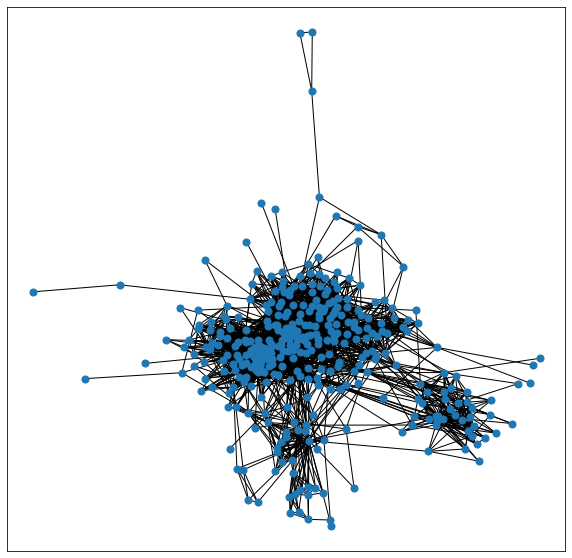

In [25]:
lada = nx.read_pajek('LadaFacebookAnon.net')

lada_lcc = lada.subgraph(max(nx.connected_components(lada), key = len).copy())

# referenced https://stackoverflow.com/questions/53734823/why-does-networkx-redraw-my-graph-different-each-run
pos = nx.spring_layout(lada_lcc, seed = 60820)

plt.figure(figsize = (10,10))
nx.draw_networkx(lada_lcc, pos = pos, node_size = 50, with_labels = False)

In [26]:
lada_sim_1 = run_simulation(lada_lcc, num_infected_1 = 5, num_infected_2 = 10, num_inoculated = 10)

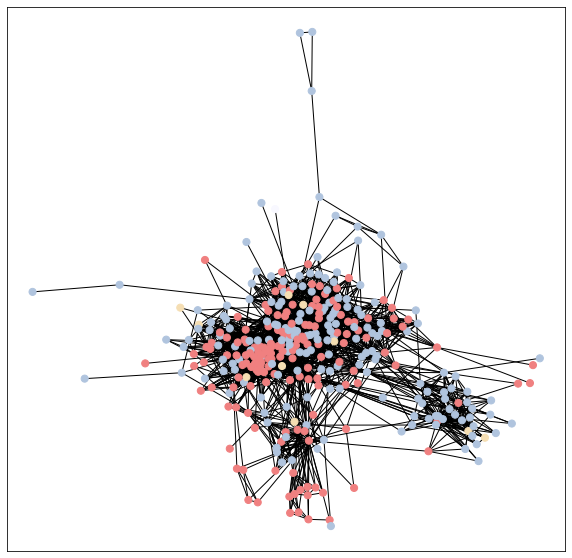

In [27]:
colors = [val_map[lada_sim_1.nodes[n]["infected_status"]] for n in lada_sim_1.nodes()]
plt.figure(figsize = (10,10))

nx.draw_networkx(lada_sim_1, pos = pos, node_size = 50, node_color = colors, with_labels=False)

In [28]:
lada_sim_2 = run_simulation2(lada_lcc, num_infected_1 = 5, num_infected_2 = 10, num_inoculated = 10)

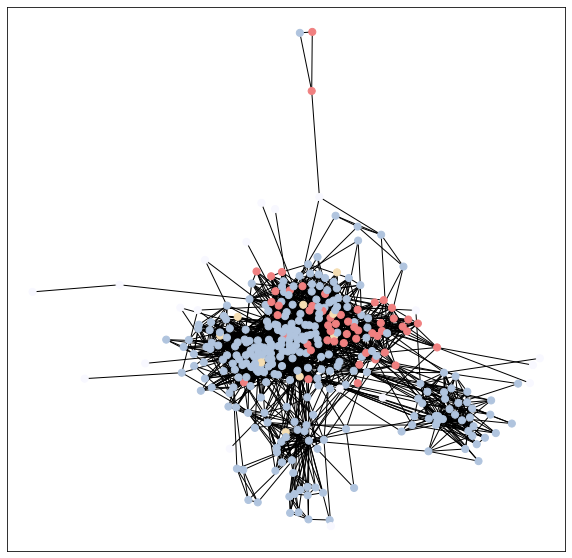

In [29]:
colors = [val_map[lada_sim_2.nodes[n]["infected_status"]] for n in lada_sim_2.nodes()]
plt.figure(figsize = (10,10))
nx.draw_networkx(lada_sim_2, pos = pos, node_size = 50, node_color = colors, edge_color = "k", with_labels=False)

In [32]:
import pandas as pd

def compare_sims(g):

    sim1_gs = []
    sim2_gs = []

    for i in range(5,11):
        sim1_g = run_simulation(g, num_infected_1 = i, num_infected_2 = 10, num_inoculated = 5)
        sim2_g = run_simulation2(g, num_infected_1 = i, num_infected_2 = 10, num_inoculated = 5)
    
        sim1_gs.append(sim1_g)
        sim2_gs.append(sim2_g)
    
    infected_1 = []
    infected_2 = []
    infected_1_blue = []
    infected_2_blue = []

    for i in range(len(sim1_gs)):
        num_infected = len([n for n in nx.get_node_attributes(sim1_gs[i], 'infected_status').values() if n == 1])
        infected_1.append(num_infected)

    for i in range(len(sim2_gs)):
        num_infected = len([n for n in nx.get_node_attributes(sim2_gs[i], 'infected_status').values() if n == 1])
        infected_2.append(num_infected)

    for i in range(len(sim1_gs)):
        num_infected = len([n for n in nx.get_node_attributes(sim1_gs[i], 'infected_status').values() if n == 2])
        infected_1_blue.append(num_infected)

    for i in range(len(sim2_gs)):
        num_infected = len([n for n in nx.get_node_attributes(sim2_gs[i], 'infected_status').values() if n == 2])
        infected_2_blue.append(num_infected)

    final_df = pd.DataFrame({'num_red_beginning': [5, 6, 7, 8, 9, 10],
                             'num_red_end_1': infected_1,
                             'num_red_end_2': infected_2,
                            'num_blue_end_1': infected_1_blue,
                            'num_blue_end_2': infected_2_blue})

    final_df['pct_end_red_1'] = final_df['num_red_end_1']/len(lada_lcc.nodes())
    final_df['pct_end_red_2'] = final_df['num_red_end_2']/len(lada_lcc.nodes())
    final_df['pct_end_blue_1'] = final_df['num_blue_end_1']/len(lada_lcc.nodes())
    final_df['pct_end_blue_2'] = final_df['num_blue_end_2']/len(lada_lcc.nodes())

    return sim1_gs, sim2_gs, final_df

# compare_sims(lada_lcc)

**Create a plot where the x-axis denotes the number of nodes initially infected with red (will vary between 5 and 10), and the y-axis denotes the fraction of the graph infected with a given color.**

**There will be 4 curves:   
(i) fraction of graph infected with blue when using the model in `run_simulation()`,**

**(ii) fraction of graph infected with blue when using the model in `run_simulation2()`,** 

**(iii) fraction of graph infected with red when using the model in `run_simulation()`,**   

**(iv) fraction of graph infected with red when using the model in `run_simulation2()`.**

In [36]:
from tqdm import tqdm

df_results = pd.DataFrame(columns = ['num_red_beginning','num_red_end_1','num_red_end_2','num_blue_end_1','num_blue_end_2'])

for i in tqdm(range(20)): # using smaller number due to computational constraints
    results = compare_sims(lada_lcc)[2]
    df_results = pd.concat([df_results, results])

100%|██████████| 20/20 [25:00<00:00, 75.01s/it]


In [37]:
df_results

,num_red_beginning,num_red_end_1,num_red_end_2,num_blue_end_1,num_blue_end_2,pct_end_red_1,pct_end_red_2,pct_end_blue_1,pct_end_blue_2
0,5,124,78,221,247,0.354286,0.222857,0.631429,0.705714
1,6,204,218,141,107,0.582857,0.622857,0.402857,0.305714
2,7,166,108,179,218,0.474286,0.308571,0.511429,0.622857
3,8,169,91,175,234,0.482857,0.260000,0.500000,0.668571
4,9,125,91,220,233,0.357143,0.260000,0.628571,0.665714
...,...,...,...,...,...,...,...,...,...
1,6,113,137,232,187,0.322857,0.391429,0.662857,0.534286
2,7,142,111,203,213,0.405714,0.317143,0.580000,0.608571
3,8,205,115,140,210,0.585714,0.328571,0.400000,0.600000
4,9,140,97,205,231,0.400000,0.277143,0.585714,0.660000


In [39]:
df_results = df_results.astype(float)

In [40]:
data_to_plot = df_results[['num_red_beginning','pct_end_red_1','pct_end_red_2','pct_end_blue_1','pct_end_blue_2']]

data_to_plot = pd.DataFrame(data_to_plot.sort_values('num_red_beginning').set_index('num_red_beginning').stack().reset_index().rename(columns = {'level_1':'pct_status',0:'pct_end'}))

data_to_plot

,num_red_beginning,pct_status,pct_end
0,5.0,pct_end_red_1,0.354286
1,5.0,pct_end_red_2,0.222857
2,5.0,pct_end_blue_1,0.631429
3,5.0,pct_end_blue_2,0.705714
4,5.0,pct_end_red_1,0.425714
...,...,...,...
475,10.0,pct_end_blue_2,0.671429
476,10.0,pct_end_red_1,0.420000
477,10.0,pct_end_red_2,0.405714
478,10.0,pct_end_blue_1,0.434286


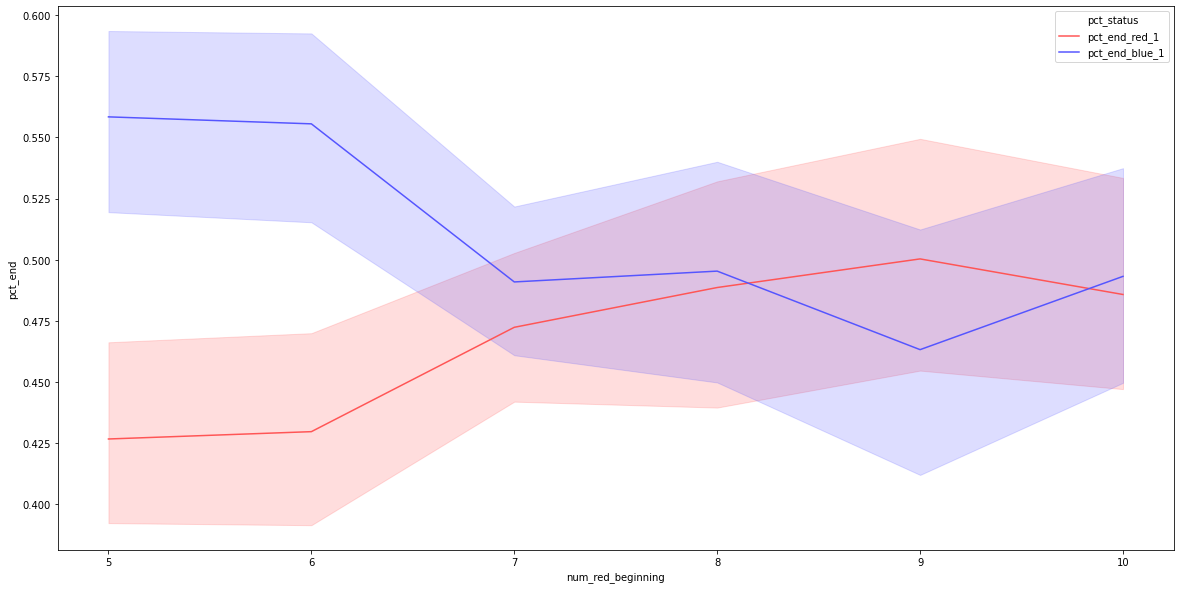

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
sns.lineplot(x = 'num_red_beginning', y = 'pct_end', hue = 'pct_status', palette = 'seismic_r',
            data = data_to_plot[data_to_plot.pct_status.isin(['pct_end_red_1', 'pct_end_blue_1'])])
plt.show()

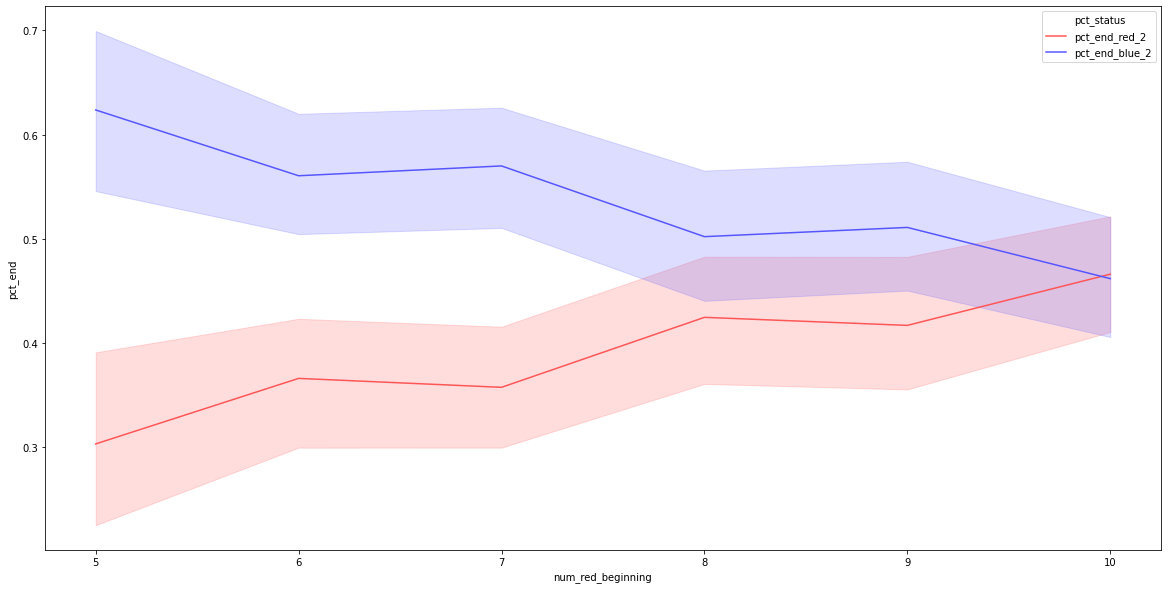

In [43]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'num_red_beginning', y = 'pct_end', hue = 'pct_status', palette = 'seismic_r',
            data = data_to_plot[data_to_plot.pct_status.isin(['pct_end_red_2', 'pct_end_blue_2'])])
plt.show()